In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm

## investigating volatility linkages between oil, gas, and regionalised coal futures markets ##

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/data/df_rr.csv'

df_rr = pd.read_csv(url)
df_rr["DATE"] = pd.to_datetime(df_rr["DATE"],dayfirst=True)
for col in df_rr.columns[1:]:
    df_rr[col] = pd.to_numeric(df_rr[col],errors='coerce')

print(df_rr)

           DATE     WTI_HH   NCF_RCF   NCF_WTI     NCF_HH    NCF_NBP  \
0    2009-01-05   8.337907  0.920024  1.597408  13.319039   9.317755   
1    2009-01-06   7.960656  0.918079  1.673188  13.319672   9.094982   
2    2009-01-07   7.258065  0.911884  1.839766  13.353141   8.969184   
3    2009-01-08   6.993289  0.942262  1.898992  13.280201   9.340782   
4    2009-01-09   7.266071  0.920958  1.889899  13.732143   9.019865   
...         ...        ...       ...       ...        ...        ...   
2850 2020-08-25  16.996063  1.017382  1.152421  19.586614  15.375235   
2851 2020-08-26  17.146825  1.015322  1.150197  19.722222  15.008563   
2852 2020-08-27  17.015873  1.018405  1.161381  19.761905  14.134232   
2853 2020-08-28  17.463415  0.969349  1.177840  20.569106  13.098330   
2854 2020-08-31  18.526087  0.982042  1.219197  22.586957  13.412611   

         NCF_B     RCF_B    RCF_NBP     WTI_B  ...  NCF_RCF_r  NCF_WTI_r  \
0     1.564893  1.700927  10.127733  0.979645  ...   1.0573

In [15]:
## markov regime switching for price ratio returns ##

mod = sm.tsa.MarkovRegression(df_rr['NCF_RCF'], k_regimes=2, order=1, switching_variance=True)
res_mod = mod.fit()
res_mod.summary()

C:\Users\User\Anaconda3\envs\joe_phd\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\User\Anaconda3\envs\joe_phd\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\User\Anaconda3\envs\joe_phd\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\User\Anaconda3\envs\joe_phd\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                NCF_RCF   No. Observations:                 2855
Model:               MarkovRegression   Log Likelihood                2026.765
Date:                Thu, 10 Feb 2022   AIC                          -4041.530
Time:                        11:36:46   BIC                          -4005.789
Sample:                             0   HQIC                         -4028.642
                               - 2855                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8537        nan        nan        nan         nan         nan
sigma2      1.015e-06        nan        nan        nan         nan         nan
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0818      0.002    485.860      0.000       1.077       1.086
sigma2         0.0142      0.000     37.782      0.000       0.013       0.015
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]     4.652e-14      0.110   4.24e-13      1.000      -0.215       0.215
p[1->0]     5.313e-21   2.25e-10   2.36e-11      1.000   -4.41e-10    4.41e-10
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 1.16e+22. Standard errors may be unstable.
"""

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:} &     NBP\_HH      & \textbf{  No. Observations:  } &    2855     \\
\textbf{Model:}         & MarkovRegression & \textbf{  Log Likelihood     } & -1692.030   \\
\textbf{Date:}          & Thu, 10 Feb 2022 & \textbf{  AIC                } &  3396.059   \\
\textbf{Time:}          &     11:09:32     & \textbf{  BIC                } &  3431.800   \\
\textbf{Sample:}        &        0         & \textbf{  HQIC               } &  3408.947   \\
\textbf{}               &      - 2855      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{const}  &       1.4415  &        0.010     &   142.314  &         0.000        &        1.422    &        1.461     \\
\textbf{sigma2} &       0.0847  &        0.004     &    21.406  &         0.000    

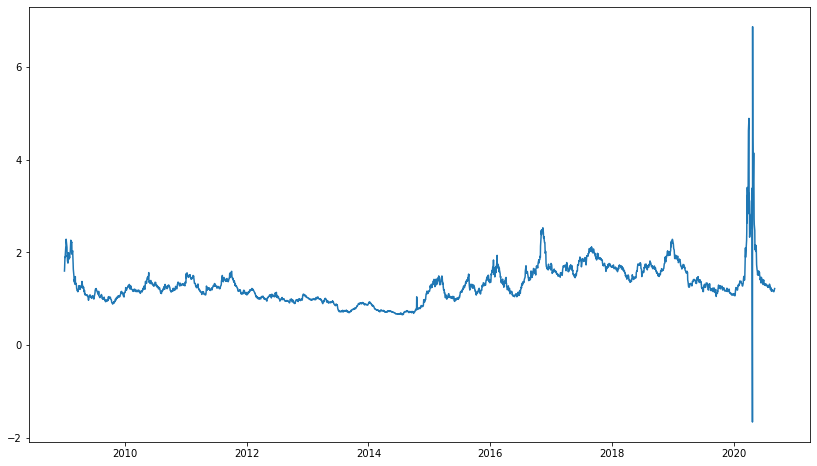

In [12]:
print(res_mod.summary().as_latex())
plt.figure(figsize=(14,8)) 
plt.plot(df_rr["DATE"],df_rr["NCF_WTI"])

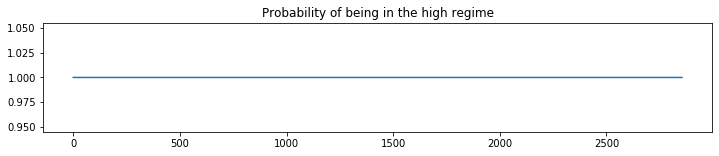

In [16]:
res_mod.filtered_marginal_probabilities[1].plot(
    title='Probability of being in the high regime', figsize=(12,2))